In [14]:
import dask.dataframe as dd
import pandas as pd
data = pd.read_csv("trips_by_distance.csv")
print(data.dtypes)
data.head()

Level                              object
Date                               object
State FIPS                        float64
State Postal Code                  object
County FIPS                       float64
County Name                        object
Population Staying at Home        float64
Population Not Staying at Home    float64
Number of Trips                   float64
Number of Trips <1                float64
Number of Trips 1-3               float64
Number of Trips 3-5               float64
Number of Trips 5-10              float64
Number of Trips 10-25             float64
Number of Trips 25-50             float64
Number of Trips 50-100            float64
Number of Trips 100-250           float64
Number of Trips 250-500           float64
Number of Trips >=500             float64
Row ID                             object
Week                                int64
Month                               int64
dtype: object


,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,1/1/2019,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,1/2/2019,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,1/3/2019,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,1/4/2019,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,1/5/2019,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [19]:

# Define the data types for each column
new_data_types = {
    'Level': 'category',
    'Date': 'datetime64[ns]',
    'State FIPS': 'Int64',
    'State Postal Code': 'object',
    'County FIPS': 'Int64',
    'County Name': 'object',
    'Population Staying at Home': 'Int64',
    'Population Not Staying at Home': 'Int64',
    'Number of Trips': 'Int64',
    'Number of Trips <1': 'Int64',
    'Number of Trips 1-3': 'Int64',
    'Number of Trips 3-5': 'Int64',
    'Number of Trips 5-10': 'Int64',
    'Number of Trips 10-25': 'Int64',
    'Number of Trips 25-50': 'Int64',
    'Number of Trips 50-100': 'Int64',
    'Number of Trips 100-250': 'Int64',
    'Number of Trips 250-500': 'Int64',
    'Number of Trips >=500': 'Int64',
    'Row ID': 'object',
    'Week': 'Int64',
    'Month': 'Int64'
}




# Fill null values according to data types
for column, dtype in new_data_types.items():
    if dtype == 'Int64':
        data[column] = data[column].fillna(0)  #if the data type is integer Fill with 0
    elif dtype == 'object':
        data[column] = data[column].fillna('NULL')  #if the data type is object Fill with 'NULL'




# Convert columns to specified data types
data = data.astype(new_data_types)
print(data.dtypes)
data.head()

DateParseError: year 0 is out of range: 0000-00-00

In [1]:
# import dask.dataframe as dd


# # Read the CSV file using Dask and specify data types
# data = dd.read_csv("trips_by_distance.csv", dtype=dtype)

# # Fill null values
# data['Population Staying at Home'] = data['Population Staying at Home'].fillna(0)

# # Convert floats to ints so that the mean() works
# data['Population Staying at Home'] = data['Population Staying at Home'].round().astype('int64')

# # Group by 'Week' and calculate the average of 'Population Staying at Home' for each week
# average_per_week = data.groupby('Week')['Population Staying at Home'].mean()

# # Convert the result to integer
# avperweek_int = average_per_week.astype('int64')

# # Compute the result
# avperweek_computed = avperweek_int.compute()

# print("Average number of people staying at home per week") 
# print(avperweek_computed)


In [4]:

import pandas as pd

# Read the CSV file
data = pd.read_csv("trips_by_distance.csv")

# Fill null values with 0/NaN (depending on what you want)
data['Population Staying at Home'] = data['Population Staying at Home'].fillna(0)

# Round floats to ints
data['Population Staying at Home'] = data['Population Staying at Home'].round().astype('int64')

# Group by 'Week' and calculate the average of 'Population Staying at Home' for each week using mean() function
avg_staying_at_home_per_week = data.groupby('Week')['Population Staying at Home'].mean()

# Converting the result to integer
average_per_week_int = avg_staying_at_home_per_week.round().astype('int64')


# Print average number of people staying at home per week
print("Average number of people staying at home per week:")

# Using For loop to iterate over the DataFrame and display each value for weeks in average_per_week_int:
for weeks, avg in average_per_week_int.items():
    print("Week",weeks,":",avg)



Average number of people staying at home per week:
Week 0 : 119920
Week 1 : 150425
Week 2 : 148843
Week 3 : 146186
Week 4 : 146096
Week 5 : 144465
Week 6 : 143063
Week 7 : 146382
Week 8 : 138576
Week 9 : 138429
Week 10 : 138865
Week 11 : 153176
Week 12 : 155527
Week 13 : 157456
Week 14 : 157540
Week 15 : 158647
Week 16 : 154043
Week 17 : 153782
Week 18 : 153610
Week 19 : 148047
Week 20 : 141353
Week 21 : 149057
Week 22 : 147543
Week 23 : 85363
Week 24 : 86244
Week 25 : 104298
Week 26 : 109338
Week 27 : 107043
Week 28 : 107307
Week 29 : 111325
Week 30 : 110077
Week 31 : 108144
Week 32 : 102651
Week 33 : 102236
Week 34 : 106003
Week 35 : 110383
Week 36 : 110761
Week 37 : 110403
Week 38 : 109862
Week 39 : 111008
Week 40 : 111850
Week 41 : 111122
Week 42 : 111764
Week 43 : 134637
Week 44 : 2425559
Week 45 : 2964568
Week 46 : 3088759
Week 47 : 3115323
Week 48 : 3009276
Week 49 : 3042222
Week 50 : 3075785
Week 51 : 3264755
Week 52 : 3259163


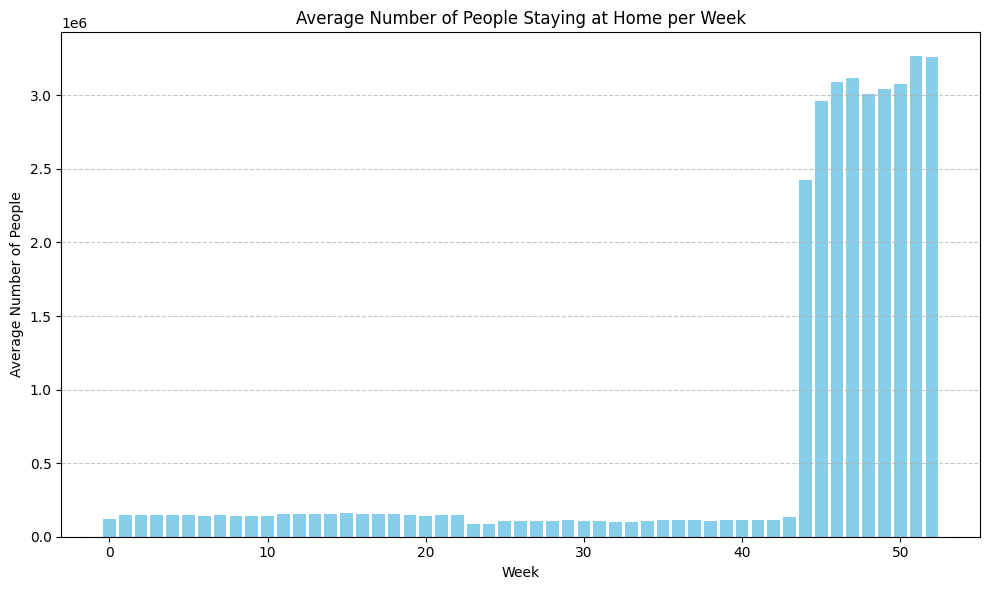

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("C:/Users/shoai/Desktop/big data project/trips_by_distance.csv")

# Fill null values with 0
data['Population Staying at Home'] = data['Population Staying at Home'].fillna(0)

# Calculate the average number of people staying at home per week
average_per_week = data.groupby('Week')['Population Staying at Home'].mean().round().astype('int64')

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(average_per_week.index, average_per_week.values, color='skyblue', width=0.8)
plt.title('Average Number of People Staying at Home per Week')
plt.xlabel('Week')
plt.ylabel('Average Number of People')
plt.xticks(rotation=0)  # Rotate x-axis labels to horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# The numbers displayed on the y-axis (0.0, 0.5, 1.0, 2.0, etc.) represent the ticks or values of the y-axis. 
# These numbers indicate the scale of the y-axis, showing the range of values for the variable being plotted 
# (in this case, the average number of people staying at home per week).
# The "le6" notation you mentioned likely indicates that the values are in scientific notation. "le6" stands for "times 10 to the power of 6," 
# which means the values are multiplied by 10 raised to some power. This notation is used to represent large numbers in a compact format.
# For example, if you see "2.5e6" on the y-axis, it means 2.5 times 10 raised to the power of 6, which is equivalent to 2,500,000.

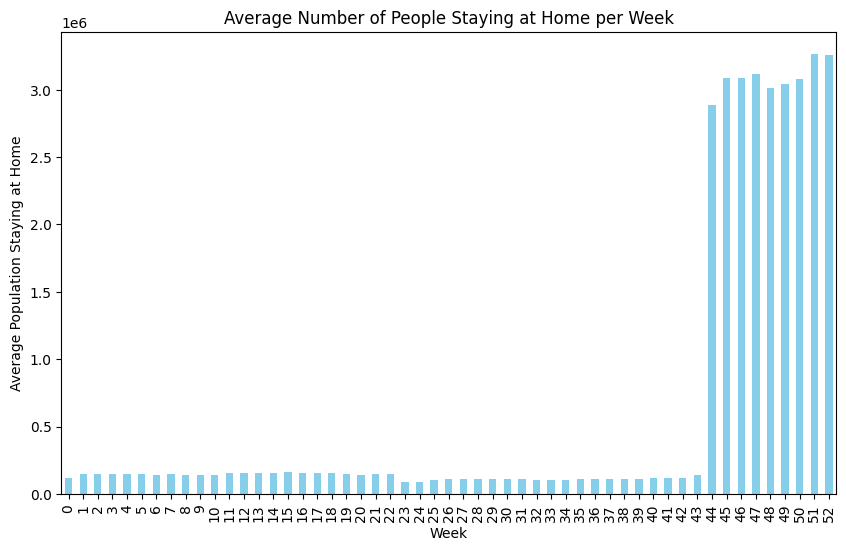

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
trip_by_distance = pd.read_csv("C:/Users/shoai/Desktop/big data project/trips_by_distance.csv", encoding='latin-1')



# Calculate the average number of people staying at home per week
avg_people_staying_at_home = trip_by_distance.groupby('Week')['Population Staying at Home'].mean()



# Visualization - Average number of people staying at home per week
plt.figure(figsize=(10, 6))
avg_people_staying_at_home.plot(kind='bar', color='skyblue')
plt.title('Average Number of People Staying at Home per Week')
plt.xlabel('Week')
plt.ylabel('Average Population Staying at Home')
plt.show()

